### <div style="text-align:center;background-color: #F5A623; padding: 20px;color: Black"> <b>Assumption of linear regression</b></div>

<b><span style='color:pink'>The assumptions in linear regression can be categorized into the following categories:</span><b>

<b>`Assumptions related to the dependent variable:`</b>

- Linearity assumption: The relationship between the dependent variable and the independent variable(s) is linear.

<b> `Assumptions related to the errors or residuals: `</b>

- Independence assumption: The errors or residuals are independent of each other.

- Homoscedasticity assumption: The variance of the errors is constant across all levels of the independent variable(s).

- Normality assumption: The errors are normally distributed.

<b>`Assumptions related to the independent variables:`</b>

- No multicollinearity assumption: There is no perfect multicollinearity among the independent variables.

### <div style="text-align:center;background-color: #F5A623; padding: 20px;color: Black"> <b>Linearity Assumption </b></div>

The <b>linearity assumption</b> in statistics refers to the relationship between the independent and dependent variables in a regression analysis. In plain English, it means that the relationship between the variables is best represented by a straight line.

In a linear regression analysis, we assume that the relationship between the independent and dependent variables can be described by the equation:

$ y = b0 + b1x1 + b2x2 + ... + bnxn + e $

where y is the dependent variable, x1, x2, ..., xn are the independent variables, b0, b1, b2, ..., bn are the model coefficients, and e is the error term. The linearity assumption states that the relationship between y and x1, x2, ..., xn can be approximated by a linear function.



##### <SPAN STYLE='COLOR:PINK'>When the linearity assumption is violated, it can lead to several problems:

1. Biased estimates of the model coefficients: If the relationship between the variables is nonlinear, then the estimated coefficients may not accurately reflect the true relationship.

2. Incorrect hypothesis tests: If the linearity assumption is violated, then the statistical tests used to test the significance of the model coefficients and the overall model fit may not be valid.

3. Incorrect confidence intervals: If the linearity assumption is violated, then the confidence intervals for the estimated coefficients may not accurately reflect the uncertainty in the estimates.

##### <span style='color:pink'>To check the linearity assumption in a multiple linear regression model, there are several methods that can be used:

1. Scatter plots: Create scatter plots of each independent variable against the dependent variable. If the relationship between the independent variable and the dependent variable is roughly linear, the points on the scatter plot should fall in a pattern that follows a straight line. If the relationship appears to be curved or nonlinear, this may indicate a violation of the linearity assumption.

2. Residual plots: Create residual plots by plotting the residuals (the differences between the predicted values and the actual values) against each independent variable. If the relationship between the residuals and an independent variable appears to follow a pattern (e.g. a U-shape), this may indicate a violation of the linearity assumption.



3. Polynomial terms: Add polynomial terms to your model and compare the model fit with
the original linear model. If the new model with additional terms significantly improves
the fit, it may suggest that the linearity assumption is violated.

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

x = 7 * np.random.rand(100, 1) - 2.8
y = 7 * np.random.rand(100, 1) - 2.8

z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y +2 + np.random.randn(100, 1)

df = pd.DataFrame()

df['x1'] = x.reshape(100)
df['x2'] = y.reshape(100)
df['y'] = z.reshape(100)


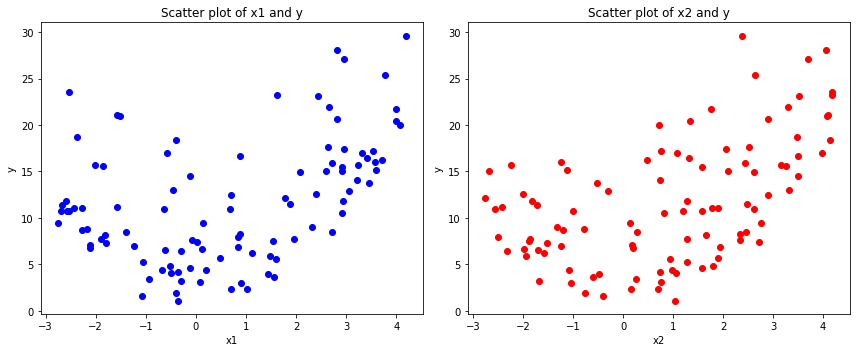

In [15]:
# Create a new figure and define subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot x1 and y
ax1.scatter(df['x1'], df['y'], color='blue')
ax1.set_title('Scatter plot of x1 and y')
ax1.set_xlabel('x1')
ax1.set_ylabel('y')

# Plot x2 and y
ax2.scatter(df['x2'], df['y'], color='red')
ax2.set_title('Scatter plot of x2 and y')
ax2.set_xlabel('x2')
ax2.set_ylabel('y')

plt.tight_layout()
plt.show()

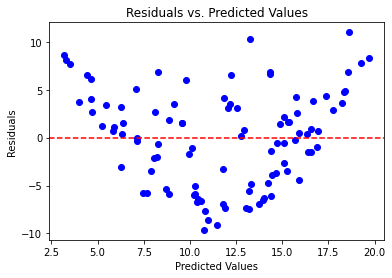

In [16]:
# 2 Residual plot 

# Fit a linear regression model
X = df[['x1', 'x2']]
y = df['y']

model = LinearRegression()
model.fit(X, y)

# Calculate predicted values and residuals
y_pred = model.predict(X)
residuals = y - y_pred

# Plot residuals against predicted values
plt.scatter(y_pred, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

plt.show()

In [17]:
# adding polynomial degree 

from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_y_pred = linear_model.predict(X_test)

# Calculate metrics for linear model
linear_r2 = r2_score(y_test, linear_y_pred)
linear_mse = mean_squared_error(y_test, linear_y_pred)

# Fit a polynomial model
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
poly_y_pred = poly_model.predict(X_test_poly)

# Calculate metrics for polynomial model
poly_r2 = r2_score(y_test, poly_y_pred)
poly_mse = mean_squared_error(y_test, poly_y_pred)

# Compare model performance
print("Linear model")
print(f"R-squared: {linear_r2:.4f}")
print(f"Mean Squared Error: {linear_mse:.4f}")

print("\nPolynomial model")
print(f"R-squared: {poly_r2:.4f}")
print(f"Mean Squared Error: {poly_mse:.4f}")

Linear model
R-squared: 0.4823
Mean Squared Error: 27.0832

Polynomial model
R-squared: 0.9822
Mean Squared Error: 0.9287


### <span style='color:pink'> What to do when the assumption fails?</span>

1. Transformations: Apply transformations to the dependent and/or independent variables
to make their relationship more linear. Common transformations include logarithmic,
square root, and inverse transformations.


2. Polynomial regression: Add polynomial terms of the independent variables to the model
to capture non-linear relationships.

3. Piecewise regression: Divide the range of the independent variable into segments and fit
separate linear models to each segment.


4. Non-parametric or semi-parametric methods: Consider using non-parametric or semi-
parametric methods that do not rely on the linearity assumption, such as generalized
additive models (GAMs), splines, or kernel regression.

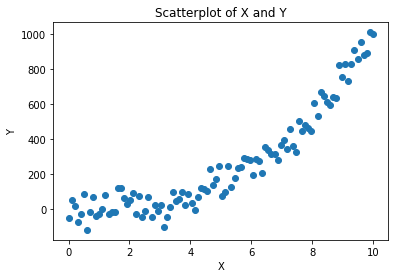

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# generate sample data with non-linear relationship
np.random.seed(123)
x = np.linspace(0, 10, 100)
y = x**3 +2*x + np.random.normal(0, 50, size=100)
lrr=LinearRegression().fit(x.reshape(-1,1),y)
pridict_orignal =lrr.predict(x.reshape(-1,1))
plt.scatter(x, y)
plt.title("Scatterplot of X and Y")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


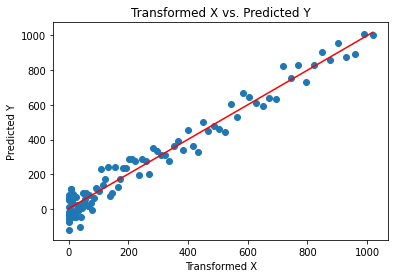

orignal_r2- 0.824412380822193
transform_r2  0.9639133054395566


In [45]:
x_transformed = x**3 + 2*x
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_transformed.reshape(-1, 1), y)

# get predictions
y_pred = model.predict(x_transformed.reshape(-1, 1))
plt.scatter(x_transformed, y)
plt.plot(x_transformed, y_pred, color='red')
plt.title("Transformed X vs. Predicted Y")
plt.xlabel("Transformed X")
plt.ylabel("Predicted Y")
plt.show()

print('orignal_r2-',r2_score(y,pridict_orignal))
print('transform_r2 ',r2_score(y,y_pred))

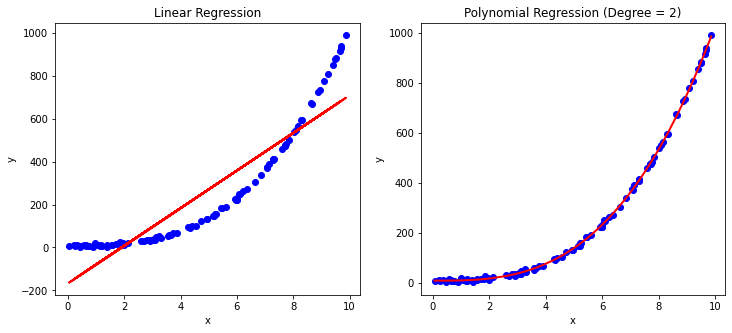

Linear regression
R-squared: 0.8435

Polynomial regression (degree = 3)
R-squared: 0.9998


In [23]:
# ADD POLYNOMIAL DEGREE 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error

# Generate a non-linear dataset with a quadratic relationship
np.random.seed(42)
x = 10 * np.random.rand(100, 1)
y = x**3+2*x + 5 + np.random.normal(0, 5, (100, 1))
y = np.abs(y)  # Ensure y is non-negative

# Fit linear regression model
linear_model = LinearRegression()
linear_model.fit(x, y)
y_pred_linear = linear_model.predict(x)

# Fit polynomial regression model (degree = 2)
poly_features = PolynomialFeatures(degree=3, include_bias=False)
x_poly = poly_features.fit_transform(x)
poly_model = LinearRegression()
poly_model.fit(x_poly, y)
y_pred_poly = poly_model.predict(x_poly)

# Visualize the fitted lines for linear and polynomial regression
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Linear regression
ax1.scatter(x, y, color='blue')
ax1.plot(x, y_pred_linear, color='red', linewidth=2)
ax1.set_title('Linear Regression')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

# Polynomial regression
ax2.scatter(x, y, color='blue')
ax2.plot(sorted(x[:, 0]), y_pred_poly[np.argsort(x[:, 0])], color='red', linewidth=2)
ax2.set_title('Polynomial Regression (Degree = 2)')
ax2.set_xlabel('x')
ax2.set_ylabel('y')

plt.show()

# Calculate R-squared for both models
r2_linear = r2_score(y, y_pred_linear)
r2_poly = r2_score(y, y_pred_poly)

# Compare the performance of the linear and polynomial regression models
print("Linear regression")
print(f"R-squared: {r2_linear:.4f}")

print("\nPolynomial regression (degree = 3)")
print(f"R-squared: {r2_poly:.4f}")


### <div style="text-align:center;background-color: #F5A623; padding: 20px;color: Black"> <b>Normality  Assumption </b></div>

In [49]:
import seaborn as sns 

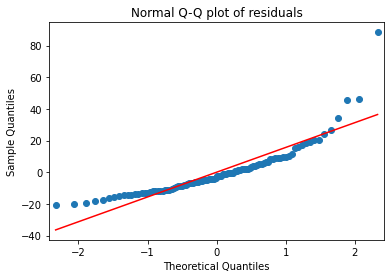

Parameter estimates with non-normally distributed errors:
[10.62230544  3.75840665]


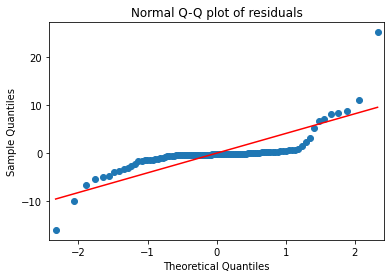

Parameter estimates with highly skewed normal errors:
[0.43083972 1.96250777]


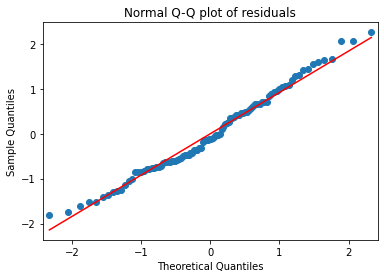

Parameter estimates with normal errors:
[0.2461248  1.98074019]


In [46]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Generate some data with a linear relationship and non-normally distributed errors
x = np.linspace(0, 10, 100)
y = 2*x + np.random.gamma(2, 10, 100)

# Fit a linear regression model
X = sm.add_constant(x)
model = sm.OLS(y, X).fit()

# Check the normality assumption of the errors
residuals = model.resid
sm.qqplot(residuals, line='s')
plt.title('Normal Q-Q plot of residuals')
plt.show()

# Print the parameter estimates
print('Parameter estimates with non-normally distributed errors:')
print(model.params)

# Generate some data with a highly skewed normal distribution for the errors
y2 = 2*x + np.random.normal(loc=0, scale=1, size=100)**3
# Fit a linear regression model
X2 = sm.add_constant(x)
model2 = sm.OLS(y2, X2).fit()
# Generate some data with normal distribution for the errors
y3 = 2*x + np.random.normal(loc=0, scale=1, size=100)

# Fit a linear regression model
X3 = sm.add_constant(x)
model3 = sm.OLS(y3, X3).fit()

# Check the normality assumption of the errors
residuals2 = model2.resid
sm.qqplot(residuals2, line='s')
plt.title('Normal Q-Q plot of residuals')
plt.show()

# Print the parameter estimates
print('Parameter estimates with highly skewed normal errors:')
print(model2.params)

# Check the normality assumption of the errors
residuals3 = model3.resid
sm.qqplot(residuals3, line='s')
plt.title('Normal Q-Q plot of residuals')
plt.show()

# Print the parameter estimates
print('Parameter estimates with normal errors:')
print(model3.params)


<AxesSubplot: ylabel='Density'>

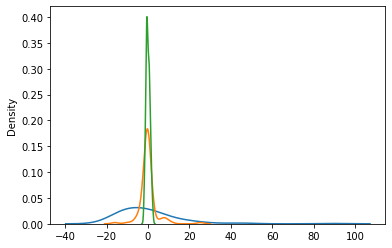

In [50]:
sns.kdeplot(residuals)
sns.kdeplot(residuals2)
sns.kdeplot(residuals3)


The error terms (residuals) are assumed to follow a normal distribution with a mean of zero
and a constant variance.

<div style='text-align:center'> ε ~ N(0, σ^2)  </div>




### <span style='color:pink'>Suppose we have a linear regression model with one predictor variable:</span>

y = β0 + β1x + ε

where y is the response variable, x is the predictor variable, β0 and β1 are the intercept and slope coefficients, and ε is the error term with a mean of 0 and variance of σ^2, assumed to be normally distributed. We can write this as:

ε ~ N(0, σ^2)

Now suppose that the normality assumption is violated, and ε is not normally distributed. Let g(ε) be the probability density function (PDF) of the distribution of ε. We can write the model as:

y = β0 + β1x + g(ε)

To simplify the math, let's assume that g(ε) has a mean of 0 and a variance of σ^2, so that the expected value of y given x is:

E(y|x) = β0 + β1x

The least squares estimate of β0 and β1 are given by:

β1 = ∑(xi - x̄)(yi - ȳ) / ∑(xi - x̄)^2

β0 = ȳ - β1x̄

where x̄ and ȳ are the sample means of x and y, respectively. The variance of the estimator of β1 is given by:

Var(β1) = σ^2 / ∑(xi - x̄)^2

Similarly, the variance of the estimator of β0 is given by:

Var(β0) = σ^2 * [1/n + x̄^2 / ∑(xi - x̄)^2]

where n is the sample size.

<span style='color:Green'><b>When the normality assumption is violated, the distribution of g(ε) can affect the properties of the least squares estimator of β0 and β1. Specifically:</b></span>

- `Biased estimates:` The least squares estimator of β0 and β1 may be biased if g(ε) has a nonzero mean. In particular, if E(g(ε)) = μ, then the least squares estimator of β1 will be biased by a factor of (1 + r^2)μ / σ^2, where r is the correlation between x and ε.

- `Inaccurate standard errors:` The standard errors of the least squares estimator of β0 and β1 may be inaccurate if g(ε) has a variance that is different from σ^2. In particular, if the variance of g(ε) is σ^2g, then the variance of the estimator of β1 will be σ^2g / ∑(xi - x̄)^2, which is different from the formula assuming normality. The variance of the estimator of β0 will similarly be affected.

- `Incorrect p-values:` The distribution of the least squares estimator of β1 and β0 may not follow a t-distribution if g(ε) is not normally distributed. This can lead to incorrect p-values for hypothesis tests and incorrect conclusions about the significance of the predictor variables.

- `Poor predictive performance:` When the normality assumption is violated, the linear regression model may have poor predictive performance, as the model may not accurately capture the relationship between x and y.

### <span style='color:pink'>Suppose we have a multiple linear regression model with p predictor variable:</span>


$ y = β0 + β1x1 + β2x2 + ... + βpxp + ε $

where y is the response variable, $xi$ (for i = 1,2,...,p) are the predictor variables, β0 and βi (for i = 1,2,...,p) are the intercept and slope coefficients, and ε is the error term with a mean of 0 and variance of $σ^2 $, assumed to be normally distributed. We can write this as:

$ ε ~ N(0, σ^2)$

Now suppose that the normality assumption is violated, and ε is not normally distributed. Let g(ε) be the probability density function (PDF) of the distribution of ε. We can write the model as:

$ y = β0 + β1x1 + β2x2 + ... + βpxp + g(ε) $

To simplify the math, let's assume that g(ε) has a mean of 0 and a variance of σ^2, so that the expected value of y given the predictor variables is:

E(y|x1,x2,...,xp) = β0 + β1x1 + β2x2 + ... + βpxp

The least squares estimates of the β coefficients are given by:

$ β = (X^TX)^-1X^Ty $

where X is the matrix of predictor variables, y is the vector of response variables, and the superscript T denotes the transpose of a matrix. The variance-covariance matrix of the estimator β is given by:

$ Var(β) = σ^2(X^TX)^-1 $

where σ^2 is the variance of ε.

<span style='color:Green'><b>When the normality assumption is violated, the distribution of g(ε) can affect the properties of the least squares estimator of β0 and β1. Specifically:</b></span>

- `Biased estimates:` The least squares estimator of β may be biased if g(ε) has a nonzero mean. In particular, if $ E(g(ε)) = μ $, then the least squares estimator of βi will be biased by a factor of $ (1 + r_i^2)μ / σ^2 $, where $ r_i $ is the correlation between xi and ε.

- `Inaccurate standard errors:` The standard errors of the least squares estimator of β may be inaccurate if g(ε) has a variance that is different from $σ^2 $. In particular, if the variance of g(ε) is $ σ^2g $, then the variance of the estimator of βi will be $σ^2g * [X^TX]_ii^-1$, which is different from the formula assuming normality.

- `Incorrect p-values:` The distribution of the least squares estimator of β may not follow a t-distribution if g(ε) is not normally distributed. This can lead to incorrect p-values for hypothesis tests and incorrect conclusions about the significance of the predictor variables.

- `Poor predictive performance:` When the normality assumption is violated, the multiple linear regression model may have poor predictive performance, as the model may not accurately capture the relationship between the predictor variables and the response variable.



## How to check this assumption
1. Histogram of residuals: Plot a histogram of the residuals to visually assess their
distribution. If the histogram resembles a bell-shaped curve, it suggests that the residuals
are normally distributed.


2. Q-Q plot: A Q-Q (quantile-quantile) plot compares the quantiles of the residuals to the
quantiles of a standard normal distribution. If the points in the Q-Q plot fall
approximately along a straight line, it indicates that the residuals are normally distributed.
Deviations from the straight line suggest deviations from normality.


3. Statistical tests: Statistical tests like `Omnibus test`, Jarque-Bera test or even `Shapiro wilk
test` can test this assumption.

In [147]:
# Generate a synthetic dataset

np.random.seed(55)
x = np.random.rand(100, 1)
y = 3 * x + np.random.normal(0, 0.2, (100, 1))
y_non_normal= 3 * x + np.random.gamma(5,45, (100, 1))

# Fit a linear regression model
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

# for the non_normal 
x=sm.add_constant(x)
model=sm.OLS(y_non_normal, X).fit()
residuals_of_non_normal=model.resid
# Calculate the residuals (error terms)
residuals = y - y_pred

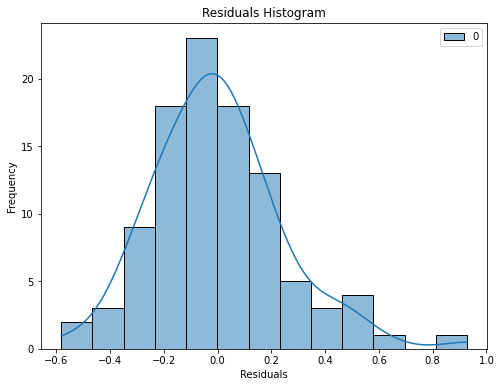

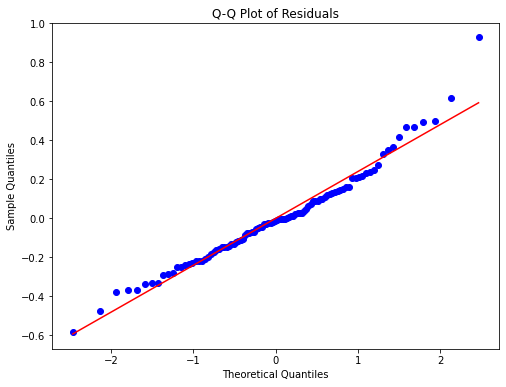

In [149]:
# Histogram
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Histogram')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Q-Q plot
from scipy import stats

plt.figure(figsize=(8, 6))
stats.probplot(residuals.flatten(), plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

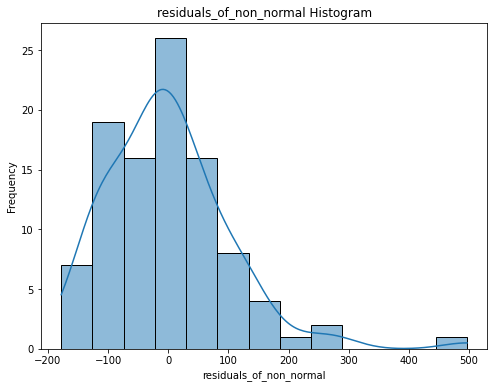

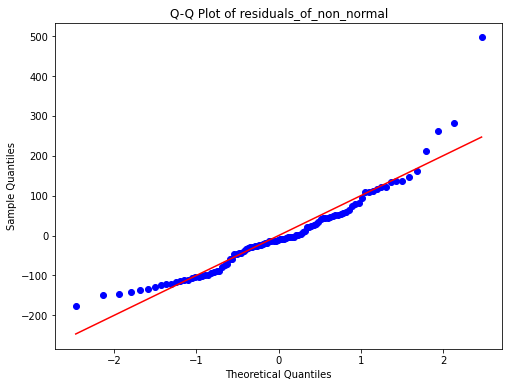

In [104]:
# Histogram
plt.figure(figsize=(8, 6))
sns.histplot(residuals_of_non_normal, kde=True)
plt.title('residuals_of_non_normal Histogram')
plt.xlabel('residuals_of_non_normal')
plt.ylabel('Frequency')
plt.show()

# Q-Q plot
from scipy import stats

plt.figure(figsize=(8, 6))
stats.probplot(residuals_of_non_normal.flatten(), plot=plt)
plt.title('Q-Q Plot of residuals_of_non_normal')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

In [105]:
mean_residuals = np.mean(residuals)
print(f"Mean of residuals: {mean_residuals:.4f}")

mean_residuals2 = np.mean(residuals_of_non_normal)
print(f"Mean of residuals_of_non_normal_distribution: {mean_residuals:.4f}")

Mean of residuals: 0.0000
Mean of residuals_of_non_normal_distribution: 0.0000


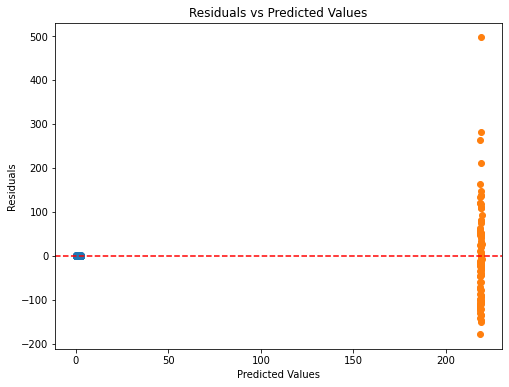

In [106]:
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.scatter(model.predict(x), residuals_of_non_normal)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()



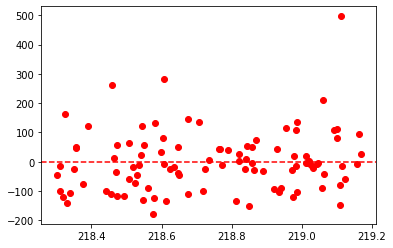

In [107]:
plt.scatter(model.predict(x), residuals_of_non_normal,color='red')
plt.axhline(y=0, color='r', linestyle='--')

In [70]:
import scipy.stats

1.4081927151603586 'a skewness value between -1 and 1 is consider as normal distribution'


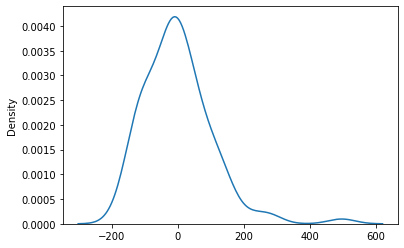

In [108]:
sns.kdeplot(residuals_of_non_normal)
print(scipy.stats.skew(residuals_of_non_normal),"'a skewness value between -1 and 1 is consider as normal distribution'")

## What to do when the assumption fails?
1. Model selection techniques: Employ model selection techniques like cross-validation, AIC,
or BIC to choose the best model among different candidate models that can handle non-
normal residuals.

2. Robust regression: Use robust regression techniques that are less sensitive to the
distribution of the residuals, such as M-estimation, Least Median of Squares (LMS), or
Least Trimmed Squares (LTS).(Transformation may also help)


3. Non-parametric or semi-parametric methods: Consider using non-parametric or semi-
parametric methods that do not rely on the normality assumption, such as generalized
additive models (GAMs), splines, or kernel regression.


4. Use bootstrapping: Bootstrap-based inference methods do not rely on the normality of
residuals and can provide more accurate confidence intervals and hypothesis tests.

- note - Remember that the normality of residuals assumption is not always critical for linear
regression, especially when the sample size is large, due to the Central Limit Theorem.

### staitical test for checking asumotion of linear 

### `shapiro wilk test`

In [89]:
from scipy.stats  import shapiro 

In [150]:
shapiro(residuals_of_non_normal)

ShapiroResult(statistic=0.9128861427307129, pvalue=6.0182292145327665e-06)

### ``Omnibus test ``
The Omnibus test is a hypothesis test that is used to determine whether the residuals (errors) in a linear regression model are normally distributed. The null hypothesis for the Omnibus test is that the residuals are normally distributed, while the alternative hypothesis is that the residuals are not normally distributed.

The Omnibus test is based on the combined test statistic of skewness and kurtosis. If the residuals are normally distributed, then the skewness and kurtosis should be close to 0. The Omnibus test statistic is computed as follows:

1. Decide the Null and Alternate Hypothesis: The Null hypothesis states
that the residuals are normally distributed and the Alternate
Hypothesis says that the residuals are not normally distributed.


2. Fit the linear regression model: Fit the linear regression model to
your data to obtain the predicted values.

3. Calculate the residuals: Compute the residuals (error terms) by
subtracting the predicted values from the observed values of the
dependent variable.


4. Calculate the skewness: Calculate the skewness of the residuals.
Skewness measures the asymmetry of the distribution. For a normal
distribution, skewness is expected to be close to zero.


5. Calculate the kurtosis: Calculate the kurtosis of the residuals.
Kurtosis measures the "tailedness" of the distribution. For a normal
distribution, kurtosis is expected to be close to zero (in excess
kurtosis terms).

6. Calculate the Omnibus test statistic: Compute the Omnibus test
statistic (K^2) using the skewness and kurtosis values. The formula
for the Omnibus test statistic is:

$ Omnibus = n * (S^2/6 + K^2/24)$


7. Determine the p-value: The Omnibus test statistic follows a chi-
square distribution with 2 degrees of freedom. Use this distribution
to calculate the p-value corresponding to the test statistic.

8. Compare the p-value to the significance level: Compare the p-value
obtained in step 6 to your chosen significance level (e.g., 0.05). If the
p-value is greater than the significance level, you can accept the null
hypothesis that the residuals are normally distributed. If the p-value
is smaller than the significance level, you reject the null hypothesis,
suggesting that the residuals may not follow a normal distribution.

In [173]:
x=sm.add_constant(x)
model=sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     1201.
Date:                Sat, 13 May 2023   Prob (F-statistic):           8.42e-57
Time:                        02:12:02   Log-Likelihood:                0.53168
No. Observations:                 100   AIC:                             2.937
Df Residuals:                      98   BIC:                             8.147
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0348      0.049      0.707      0.4

In [188]:
#

skew=scipy.stats.skew(residuals)
kutosis=scipy.stats.kurtosis(residuals)

omnibus=(skew**2)+(kutosis**2)

print((omnibus/)*50)




[36.43322614]


In [151]:
skewness = stats.skew(residuals)
kurtosis = stats.kurtosis(residuals)
omnibus_stat, omnibus_p_value = stats.normaltest(residuals)

print(f"Skewness: {skewness[0]:.4f}")
print(f"Kurtosis: {kurtosis[0]:.4f}")
print(f"Omnibus test statistic: {omnibus_stat[0]:.4f}")
print(f"Omnibus test p-value: {omnibus_p_value[0]:.4f}")

Skewness: 0.7345
Kurtosis: 1.5412
Omnibus test statistic: 14.5744
Omnibus test p-value: 0.0007


In [152]:
shapiro(residuals_of_non_normal)

ShapiroResult(statistic=0.9128861427307129, pvalue=6.0182292145327665e-06)

In [153]:
shapiro(residuals)

ShapiroResult(statistic=0.9681814312934875, pvalue=0.016070256009697914)

In [ ]:
stats.normaltest()